In [1]:
import pandas as pd 
import h5py
import numpy as np
import dataset
import random
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import RBF
from scipy.spatial import distance_matrix
import select

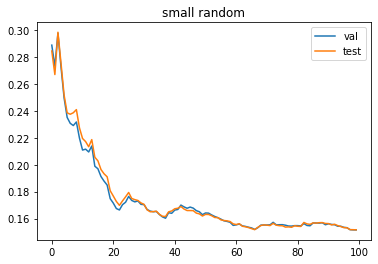

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt 
with open("./results/my4r.pkl", "rb") as f:
    t = pickle.load(f) 
res1, res2 = t 
plt.plot(np.mean(res1[:, :].reshape(3, -1), axis=0), label="val")
plt.plot(np.mean(res2[:, :].reshape(3, -1), axis=0), label="test")
plt.title("random")
plt.legend()
plt.show()

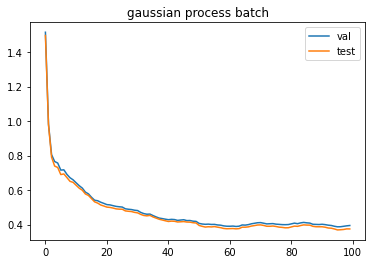

In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt 
with open("./results/my6gb.pkl", "rb") as f:
    t = pickle.load(f) 
res1, res2 = t 
plt.plot(np.mean(res1[:, :].reshape(3, -1), axis=0), label="val")
plt.plot(np.mean(res2[:, :].reshape(3, -1), axis=0), label="test")
plt.title("gaussian process batch")
plt.legend()
plt.show()

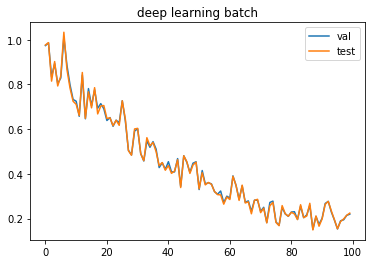

In [8]:
import pickle
import numpy as np
import matplotlib.pyplot as plt 
with open("./results/my6gd.pkl", "rb") as f:
    t = pickle.load(f) 
res1, res2 = t 
plt.plot(np.mean(res1[:, :].reshape(3, -1), axis=0), label="val")
plt.plot(np.mean(res2[:, :].reshape(3, -1), axis=0), label="test")
plt.title("deep learning batch")
plt.legend()
plt.show()

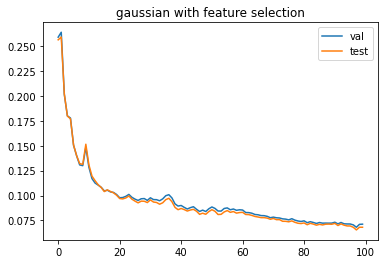

In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt 
with open("./results/my4gbf.pkl", "rb") as f:
    t = pickle.load(f) 
res1, res2 = t 
plt.plot(np.mean(res1[:, :].reshape(3, -1), axis=0), label="val")
plt.plot(np.mean(res2[:, :].reshape(3, -1), axis=0), label="test")
plt.title("gaussian with feature selection")
plt.legend()
plt.show()

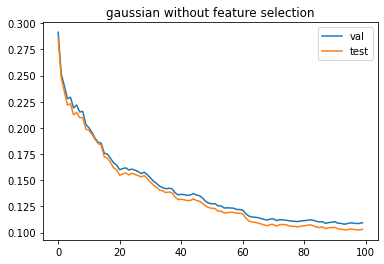

In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt 
with open("./results/my4gb.pkl", "rb") as f:
    t = pickle.load(f) 
res1, res2 = t 
plt.plot(np.mean(res1[:, :].reshape(3, -1), axis=0), label="val")
plt.plot(np.mean(res2[:, :].reshape(3, -1), axis=0), label="test")
plt.title("gaussian without feature selection")
plt.legend()
plt.show()

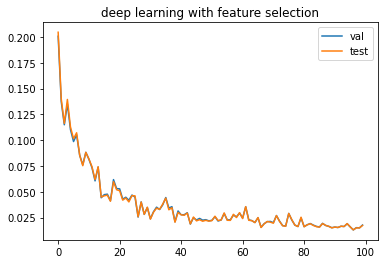

In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt 
with open("./results/my4gbfd.pkl", "rb") as f:
    t = pickle.load(f) 
res1, res2 = t 
plt.plot(np.mean(res1[:, :].reshape(3, -1), axis=0), label="val")
plt.plot(np.mean(res2[:, :].reshape(3, -1), axis=0), label="test")
plt.title("deep learning with feature selection")
plt.legend()
plt.show()

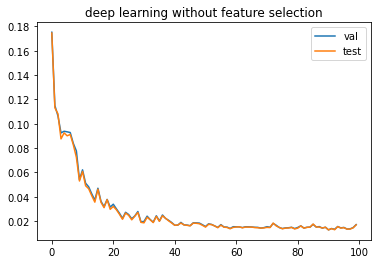

In [16]:
import pickle
import numpy as np
import matplotlib.pyplot as plt 
with open("./results/my4gd.pkl", "rb") as f:
    t = pickle.load(f) 
res1, res2 = t 
plt.plot(np.mean(res1[:, :].reshape(3, -1), axis=0), label="val")
plt.plot(np.mean(res2[:, :].reshape(3, -1), axis=0), label="test")
plt.title("deep learning without feature selection")
plt.legend()
plt.show()

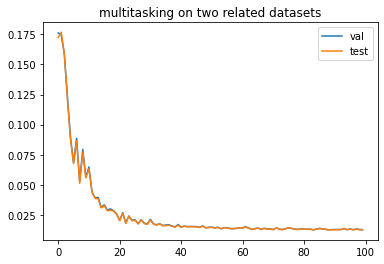

In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt 
with open("./results/twogb.pkl", "rb") as f:
    t = pickle.load(f) 
res1, res2 = t 
plt.plot(np.mean(res1[:, :].reshape(3, -1), axis=0), label="val")
plt.plot(np.mean(res2[:, :].reshape(3, -1), axis=0), label="test")
plt.title("multitasking on two related datasets")
plt.legend()
plt.show()

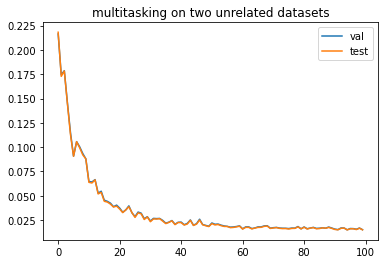

In [18]:
import pickle
import numpy as np
import matplotlib.pyplot as plt 
with open("./results/two2gb.pkl", "rb") as f:
    t = pickle.load(f) 
res1, res2 = t 
plt.plot(np.mean(res1[:, :].reshape(3, -1), axis=0), label="val")
plt.plot(np.mean(res2[:, :].reshape(3, -1), axis=0), label="test")
plt.title("multitasking on two unrelated datasets")
plt.legend()
plt.show()

In [2]:
data = dataset.get_zhuang()
# feature = dataset.get_string()
feature = dataset.get_achilles()
# datagenes = [i.decode("utf-8") for i in data.index]
# data.index = datagenes
# featuregenes = [i.decode("utf-8") for i in feature.index]
col = np.intersect1d(data.index, feature.columns)

In [5]:
import pickle 
with open("./cache/mydataset.pkl", "rb") as f:
    data = pickle.load(f)
x = data["x"]
y = data["y6"]

In [3]:
x = feature[col].values
x = x.T
y = data[col]

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
import matplotlib.pyplot as plt 
plt.hist(y, bins=100)

In [ ]:
import random 
for i in range(32):
    t = random.sample(list(range(len(y_train))), k=1000)
    lr = LinearRegression().fit(X_train[t], y_train[t])
    pre = lr.predict(X_test)
    print(mean_squared_error(y_test, pre))

In [ ]:
print(mean_squared_error(y_train, np.zeros_like(y_train)))

In [10]:
lr = Lasso().fit(X_train[:, ], y_train)
pre = lr.predict(X_test[:, ])
print(mean_squared_error(y_test, pre))

2.4591905331127033


In [ ]:
lr.get_params()

In [7]:
kernel = RBF()
lr = GaussianProcessRegressor(kernel=kernel).fit(X_train[:100], y_train[:100])
print("finish train")
pre = lr.predict(X_test)
print(mean_squared_error(y_test, pre))

finish train
5.02379452322374e-01


In [ ]:
lr = DecisionTreeRegressor().fit(X_train, y_train)
pre = lr.predict(X_test)
print(mean_squared_error(y_test, pre))

In [ ]:
lr = RandomForestRegressor().fit(X_train, y_train)
pre = lr.predict(X_test)
print(mean_squared_error(y_test, pre))

In [ ]:
lr = Ridge().fit(X_train, y_train)
pre = lr.predict(X_test)
print(mean_squared_error(y_test, pre))

In [ ]:
data = dataset.get_ifng()
feature = dataset.get_string()

In [ ]:
datagenes = [i.decode("utf-8") for i in data.index]
col = np.intersect1d(datagenes, feature.columns)


In [ ]:
NUM_SIMU = 1 
NUM_SAM = 8000//50
def simulate(df, seed, method):
    valres_active = np.zeros((NUM_SIMU, 3, NUM_SAM))
    testres_active = np.zeros((NUM_SIMU, 3, NUM_SAM))
    for i in range(NUM_SIMU):
        random.seed(i + seed)
        np.random.seed(seed=i+seed)
        # 5-fold cross validation
        kf = KFold(n_splits=3, shuffle=True)
        cnt = -1
        print(i)
        for trainidx, testidx in kf.split(df):
            cnt+=1
            trainds = df.iloc[trainidx]
            trainds = dataset.BaseDataset(trainds, ini=800)
            testds = df.iloc[testidx]
            for j in tqdm(range(NUM_SAM)):
                d = trainds.getKnown()
                y = d["y"]
                x = d.drop("y", axis=1)
                gm = LinearRegression().fit(x, y)
                d["pre"] = gm.predict(x)
                test_x = testds.drop("y", axis=1)
                predict = gm.predict(test_x)
                testres_active[i, cnt, j] = mean_squared_error(testds["y"], predict)
                du = trainds.getUnknown()
                dux = du.drop("y", axis=1)
                predict = gm.predict(dux)

                valres_active[i, cnt, j] = mean_squared_error(du["y"], predict)
                if method == 'random':
                    new_points = np.random.sample(range(len(du)), k=50)
                    for new_point in new_points:
                        trainds.addKnown(du.index[new_point])

                else:
                    raise NotImplementedError

    return testres_active, valres_active

In [ ]:
df = feature[col].T
df.head()

In [ ]:
df["y"] = data[col]

In [ ]:
df.head()

In [ ]:
res1, res2 = simulate(df, 100, "random")


In [ ]:
res1.shape

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.mean(res1[:, :, :2000].reshape(5, -1), axis=0), label="val")
plt.plot(np.mean(res2[:, :, :2000].reshape(5, -1), axis=0), label="test")
plt.legend()